In [1]:
import pickle

def load_traffic_sign(file): 
    with open(file, 'rb') as f: 
        dataset = pickle.load(f)
        
    return dataset['features'], dataset['labels']
    
training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

X_train, y_train = load_traffic_sign(training_file)
X_valid, y_valid = load_traffic_sign(validation_file)
X_test, y_test = load_traffic_sign(testing_file)

## Label distribution

In [1]:
import pandas as pd 
from keras.utils import to_categorical
onehot_y = to_categorical(y_train)

Using TensorFlow backend.


ImportError: cannot import name 'to_categorical'

In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_context('poster')

def assemble_df(X, y, set_name=''):
    temp = pd.DataFrame()
    temp['X'] = [x for x in X]
    temp['y'] = y
    temp['set'] = set_name
    return temp

train_df = assemble_df(X_train, y_train, 'train')
validation_df = assemble_df(X_valid, y_valid, 'validation')
test_df = assemble_df(X_test, y_test, 'test')

dataset_df = pd.concat([train_df, validation_df, test_df], axis=0)

# train_class_dist = pd.DataFrame(y_train, columns=['label']).reset_index().groupby('label').agg('count')
# test_class_dist = pd.DataFrame(y_test, columns=['label']).reset_index().groupby('label').agg('count')

# ax.set_title("Traffic Sign Training Set")

Populating the interactive namespace from numpy and matplotlib


NameError: name 'X_train' is not defined

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

from skimage import data, img_as_float
from skimage import exposure
from skimage import data, img_as_float
from skimage import exposure

def adaptiveHist(img):
    # Contrast stretching
    p10, p90 = np.percentile(img, (10, 90))
    img_rescale = exposure.rescale_intensity(img, in_range=(p10, p90))
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.05)
    
    return img_adapteq

## Altering images by Rotation

In [ ]:
datagen = ImageDataGenerator(rotation_range=30)

/Users/trimchala/miniconda/envs/aind-dog/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


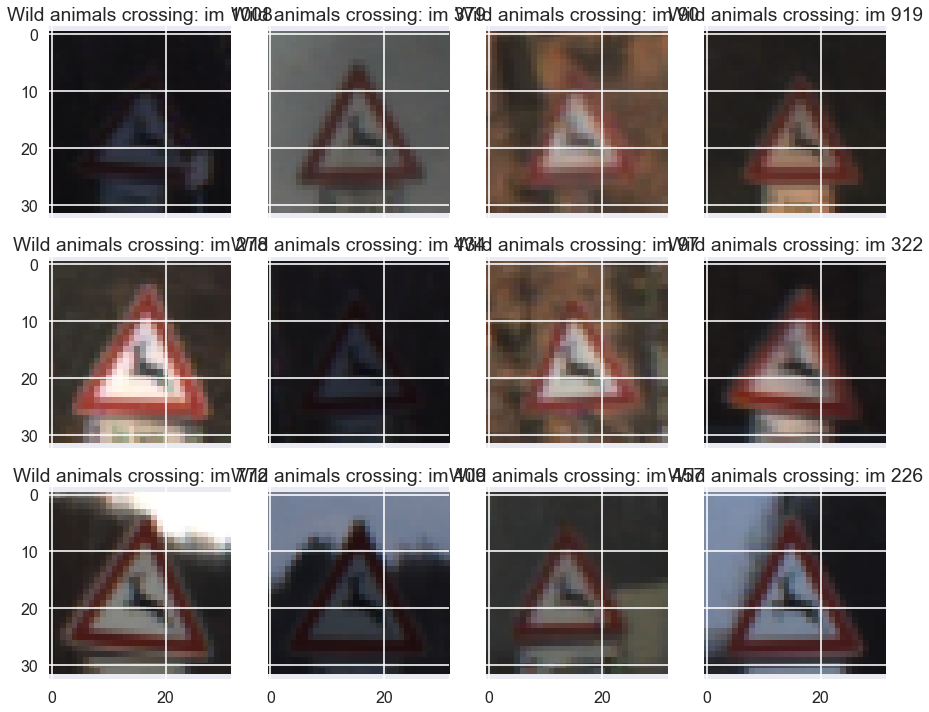

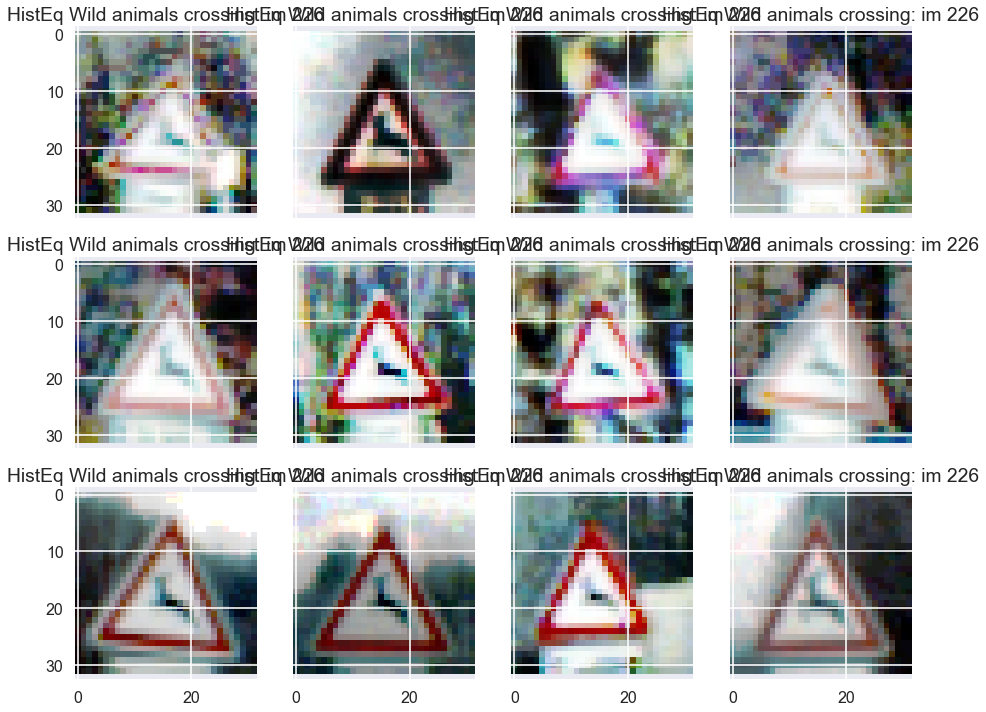

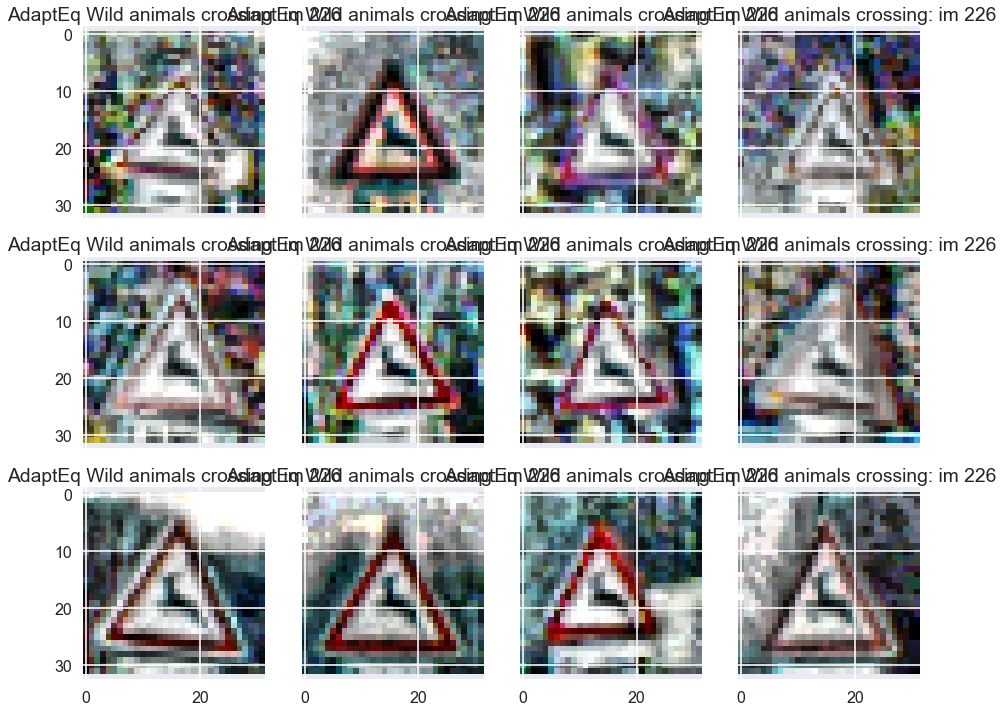

In [14]:
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import cv2
num_classes = 43
signname = pd.read_csv('signnames.csv')
class_idx = np.random.randint(low=0, high=num_classes, size = 1)[0]
selected_signname = signname[signname['ClassId']==class_idx]['SignName'].values[0]

def equalizeHistRgb(image):
    eq = image
    for dim in range(image.shape[-1]):
        eq[:, :, dim] = cv2.equalizeHist(image[:, :, dim])
        
    return eq

# def display_sample_by_class(dataset_df, class_idx):
# def normalize(im):
f1, axes1 = plt.subplots(3, 4, sharex='col', sharey='row', figsize=(15, 12))
dataset_df = pd.merge(dataset_df, signname, left_on='y', right_on='ClassId', how='left')
class_df = dataset_df[dataset_df['y']==class_idx].reset_index(drop=True)
selected_image_indices = np.random.randint(low=0, high=len(class_df), size=12)
images = class_df['X'].ix[selected_image_indices]
for image, ax, idx in zip(images, chain(*axes1), selected_image_indices): 
#     ax.imshow(cv2.normalize(image, np.zeros((800, 800)),0, 2**8, norm_type=cv2.NORM_MINMAX))
    ax.imshow(image)
    ax.set_title('{}: im {}'.format(selected_signname, str(idx)))

f2, axes2 = plt.subplots(3, 4, sharex='col', sharey='row', figsize=(15, 12))
for image, ax in zip(images, chain(*axes2)): 
    ax.imshow(equalizeHistRgb(image))
    ax.set_title('HistEq {}: im {}'.format(selected_signname, str(idx)))
    
f3, axes3 = plt.subplots(3, 4, sharex='col', sharey='row', figsize=(15, 12))
for image, ax in zip(images, chain(*axes3)): 
    ax.imshow(adaptiveHist(image))
    ax.set_title('AdaptEq {}: im {}'.format(selected_signname, str(idx)))

Improvements
1. Preprocessing: Histogram normalization
2. Balancing Class
3. Deeper Network Architecture
4. Better weight initialization: xavier, lecun normal
5. Data Augmentation

Quantifying contributions for each improvement
Metrics: 
1. Training time
2. Convergence rate (number of epoches until convergence)
3. Test accuracy, Confusion

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False
)
datagen.fit(X_train.astype(float))

In [18]:
datagen.flow(X_train, y_train, batch_size=32, save_to_dir=True, save_prefix='test_data_gen')

In [126]:
class_X = class_df[class_df['y']==1]
class_X

,X,y,set,ClassId,SignName


In [120]:
signname

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
tf.contrib.keras.initializers.he_normal